#Problem Statement:- Build a model to detect fraudulent credit card transactions.

In [1]:
###---------------------------
### Import Necessory Libraries
###---------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
###-------------
### Load Dataset
###-------------

# file_path = '/content/drive/MyDrive/Fraud dataset/'

data = pd.read_csv('fraudTrain.csv')

In [3]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
data.shape

(1296675, 23)

In [5]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
# Drop columns which will not going to make any impact on result...
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last',
                   'street', 'city', 'state', 'zip', 'lat', 'long', 'dob',
                   'trans_num', 'unix_time']

data = data.drop(columns=columns_to_drop, axis=1)

# Verify the remaining columns
print(data.columns)

Index(['merchant', 'category', 'amt', 'gender', 'city_pop', 'job', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city_pop    1296675 non-null  int64  
 5   job         1296675 non-null  object 
 6   merch_lat   1296675 non-null  float64
 7   merch_long  1296675 non-null  float64
 8   is_fraud    1296675 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 89.0+ MB


In [9]:
data.head()

,merchant,category,amt,gender,city_pop,job,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,3495,"Psychologist, counselling",36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,149,Special educational needs teacher,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,4154,Nature conservation officer,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,1939,Patent attorney,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,99,Dance movement psychotherapist,38.674999,-78.632459,0


In [10]:
# Checking for null values...
data.isnull().sum()

merchant      0
category      0
amt           0
gender        0
city_pop      0
job           0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

# Text Preprocessing..

In [11]:
# Minimum number of occurrences to be considered a common category

threshold = 100
for col in ['merchant', 'category', 'job']:
    value_counts = data[col].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    data[col] = data[col].replace(rare_categories, 'Other')

In [12]:
# Label encode 'gender' column
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

In [13]:
# Scale 'amt', 'city_pop', 'merch_lat', and 'merch_long' columns
# Scaling :- Technique used to bring data to same scale so every feature get same importance

scaler = StandardScaler()
data[['amt', 'city_pop', 'merch_lat', 'merch_long']] = scaler.fit_transform(data[['amt', 'city_pop', 'merch_lat', 'merch_long']])

In [14]:
data.head()

,merchant,category,amt,gender,city_pop,job,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,-0.407826,0,-0.282589,"Psychologist, counselling",-0.494354,0.593864,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,0.230039,0,-0.293670,Special educational needs teacher,2.078699,-2.030341,0
2,fraud_Lind-Buckridge,entertainment,0.934149,1,-0.280406,Nature conservation officer,0.902849,-1.592323,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,-0.158132,1,-0.287742,Patent attorney,1.662886,-1.621848,0
4,fraud_Keeling-Crist,misc_pos,-0.177094,1,-0.293835,Dance movement psychotherapist,0.026941,0.841909,0


In [15]:
data["merchant"].value_counts().count()

693

In [16]:
data["category"].value_counts().count()

14

In [17]:
data["job"].value_counts().count()

476

In [18]:
for col in ['merchant', 'category', 'job']:
    freq_encoding = data[col].value_counts().to_dict()
    data[col] = data[col].map(freq_encoding)

# Some Visualization for Better Understanding

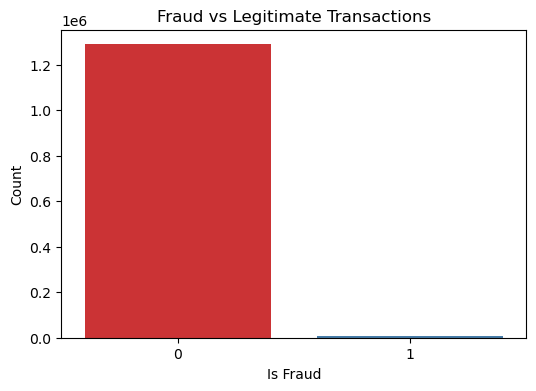

In [19]:
# Distribution of Fraud vs Legitimate Transactions

plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data, palette='Set1')
plt.title('Fraud vs Legitimate Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

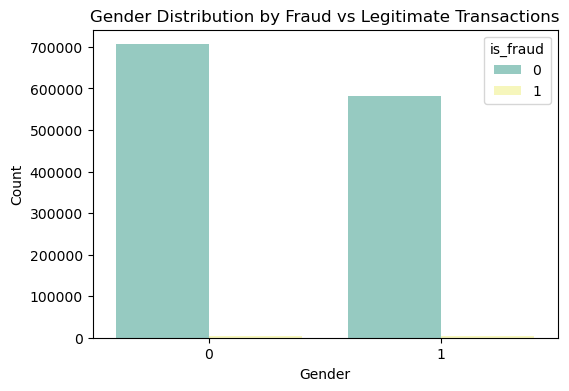

In [20]:
# Gender Distribution in Fraudulent and Legitimate Transactions

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='is_fraud', data=data, palette='Set3')
plt.title('Gender Distribution by Fraud vs Legitimate Transactions')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

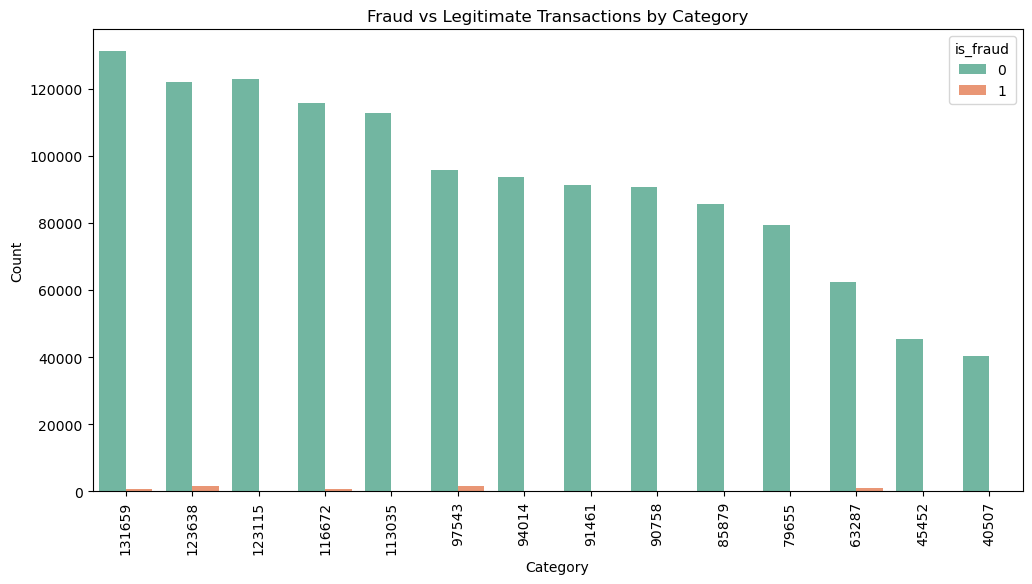

In [21]:
# Fraud vs Legitimate Transactions by Category

plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=data, palette='Set2', order=data['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Fraud vs Legitimate Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

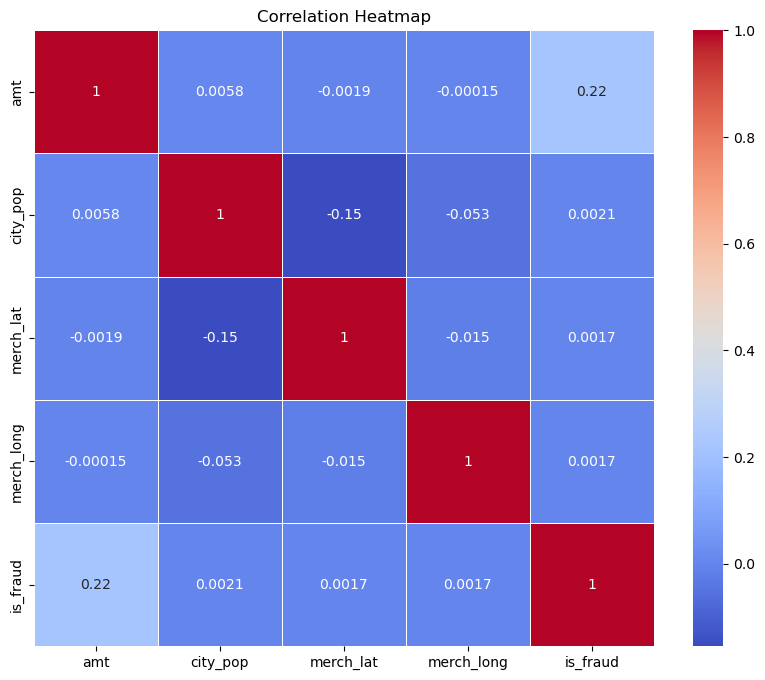

In [22]:
# Correlation Heatmap for Numerical Features

plt.figure(figsize=(10, 8))
corr_matrix = data[['amt', 'city_pop', 'merch_lat', 'merch_long', 'is_fraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Checking For Imbalanced Dataset

In [23]:
data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Dataset is imbalanced so we are using undersampling technique to tackle biased problem..

In [24]:
from sklearn.utils import resample

# Separate the majority and minority classes
fraud = data[data.is_fraud == 1]
non_fraud = data[data.is_fraud == 0]

# Undersample the majority class
non_fraud_undersampled = resample(non_fraud,
                                  replace=False,  # Sample without replacement
                                  n_samples=len(fraud),  # Match number of minority class
                                  random_state=42)  # Reproducibility

# Combine the undersampled majority class with the minority class
balanced_data = pd.concat([non_fraud_undersampled, fraud])

# Shuffle the dataset to mix fraud and non-fraud samples
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)

# Check the new class distribution
print(balanced_data['is_fraud'].value_counts())

is_fraud
1    7506
0    7506
Name: count, dtype: int64


In [25]:
balanced_data.shape

(15012, 9)

# Now we start with model Building and evaluate their performance..

In [26]:
X = balanced_data.drop('is_fraud',axis=1)

y = balanced_data['is_fraud']

In [27]:
# Split the dataset into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Use Different Algorithms..

1) Logistic Regression :-

In [28]:
log_reg = LogisticRegression(random_state = 23)

# Train the model
log_reg.fit(X_train, y_train)

# Make prediction
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8488178488178488
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1461
           1       0.93      0.76      0.84      1542

    accuracy                           0.85      3003
   macro avg       0.86      0.85      0.85      3003
weighted avg       0.86      0.85      0.85      3003

Confusion Matrix:
[[1373   88]
 [ 366 1176]]


2) Decision Tree :-

In [29]:
dec_tree = DecisionTreeClassifier(random_state = 23, class_weight='balanced')

# Train the model
dec_tree.fit(X_train, y_train)

# Make predictions
y_pred = dec_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.951048951048951
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1461
           1       0.96      0.95      0.95      1542

    accuracy                           0.95      3003
   macro avg       0.95      0.95      0.95      3003
weighted avg       0.95      0.95      0.95      3003

Confusion Matrix:
[[1394   67]
 [  80 1462]]


3) Random Forest :-

In [30]:
rand_forest = RandomForestClassifier(random_state=23, class_weight='balanced')

# Train the model
rand_forest.fit(X_train, y_train)

# Make predictions
y_pred = rand_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9553779553779553
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1461
           1       0.97      0.94      0.96      1542

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003

Confusion Matrix:
[[1421   40]
 [  94 1448]]


In [31]:
xgb_model = xgb.XGBClassifier(random_state=23, scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.964035964035964
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1461
           1       0.97      0.96      0.96      1542

    accuracy                           0.96      3003
   macro avg       0.96      0.96      0.96      3003
weighted avg       0.96      0.96      0.96      3003

Confusion Matrix:
[[1415   46]
 [  62 1480]]


### Save the model :-

In [32]:
import pickle

with open('credit_card_fraud_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
